In [1]:
import numpy as np
import pandas as pd
import os
import sys
import matplotlib.pyplot as plt
import matplotlib as mpl
from scipy.optimize import curve_fit
from scipy.fftpack import fft, fftfreq
from functools import partial
import inspect
from scipy import signal
from scipy.signal import find_peaks
sys.path.append('../../')
from utils.utils import crop_dataframes, find_zero_crossing, sine_wave, bandpass_filter, bandpass_savgol_filter, amplitude_envelope, rms_envelope, calculate_periodogram, plot_periodogram, fit_linear_regression
import statsmodels.api as sm
from statsmodels.formula.api import ols
from statsmodels.stats.anova import AnovaRM
from statsmodels.stats.multicomp import pairwise_tukeyhsd

In [2]:
name_dict = {
    "a1":"Finger Extention (Sitting)",
    "a2":"Finger Flexion (Sitting)",
    "a3":"Wrist Flexion (Sitting)",
    "a4":"Wrist Extention (Sitting)",
    "a5":"Radial Deviation (Sitting)",
    "a6":"Ulnar Deviation (Sitting)",
    "a7":"Finger Extention (Standing)",
    "a8":"Finger Flexion (Standing)",
    "a9":"Wrist Flexion (Standing)",
    "a10":"Wrist Extention (Standing)",
    "a11":"Radial Deviation (Standing)",
    "a12":"Ulnar Deviation (Standing)",
}

# SiFi Sit

In [3]:
# load emg and log

fp = "../../data_collection/logs/2025_03_18_18_16_59_SiFi_Ex2_Sit/"

sifi_path = "sifiband/emg/emg.csv"
event_path = "event_log/event_log.csv"

sifi_df = pd.read_csv(os.path.join(fp, sifi_path))
event_df = pd.read_csv(os.path.join(fp, event_path))

In [4]:
emg_dict = {
    "a1":{},
    "a2":{},
    "a3":{},
    "a4":{},
    "a5":{},
    "a6":{},
}

for i, row in enumerate(event_df.iterrows()):
    if i%2 == 1:
        event = row[1]["Event"].split("_")[0]
        rep = row[1]["Event"].split("_")[1]
        start = event_df.loc[i-1, "Event Time"]
        end = row[1]["Event Time"]
        emg = crop_dataframes(sifi_df, start, end)
        emg_dict[event][rep] = emg

a1
1
2
3
4
5
6
                 Anova
         F Value  Num DF  Den DF Pr > F
---------------------------------------
Channel 8696.5622 7.0000 35.0000 0.0000

Multiple Comparison of Means - Tukey HSD, FWER=0.01
group1 group2 meandiff p-adj  lower upper reject
------------------------------------------------
  emg0   emg1      0.0    0.0   0.0   0.0   True
  emg0   emg2      0.0    0.0   0.0   0.0   True
  emg0   emg3      0.0    0.0   0.0   0.0   True
  emg0   emg4      0.0    0.0   0.0   0.0   True
  emg0   emg5      0.0    0.0   0.0   0.0   True
  emg0   emg6     -0.0    0.0  -0.0  -0.0   True
  emg0   emg7      0.0    0.0   0.0   0.0   True
  emg1   emg2     -0.0    0.0  -0.0  -0.0   True
  emg1   emg3     -0.0    0.0  -0.0  -0.0   True
  emg1   emg4     -0.0    0.0  -0.0  -0.0   True
  emg1   emg5     -0.0    0.0  -0.0  -0.0   True
  emg1   emg6     -0.0    0.0  -0.0  -0.0   True
  emg1   emg7     -0.0    0.0  -0.0  -0.0   True
  emg2   emg3     -0.0 0.0002  -0.0  -0.0   True
  emg

C:\Users\Hugh\AppData\Local\Temp\ipykernel_24320\2056579364.py:42: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  plt.figure(figsize=(12, 30))


Multiple Comparison of Means - Tukey HSD, FWER=0.01
group1 group2 meandiff p-adj  lower upper reject
------------------------------------------------
  emg0   emg1      0.0    0.0   0.0   0.0   True
  emg0   emg2      0.0    0.0   0.0   0.0   True
  emg0   emg3      0.0    0.0   0.0   0.0   True
  emg0   emg4      0.0    0.0   0.0   0.0   True
  emg0   emg5      0.0    0.0   0.0   0.0   True
  emg0   emg6     -0.0    0.0  -0.0  -0.0   True
  emg0   emg7      0.0    0.0   0.0   0.0   True
  emg1   emg2     -0.0    0.0  -0.0  -0.0   True
  emg1   emg3     -0.0    0.0  -0.0  -0.0   True
  emg1   emg4     -0.0    0.0  -0.0  -0.0   True
  emg1   emg5     -0.0    0.0  -0.0  -0.0   True
  emg1   emg6     -0.0    0.0  -0.0  -0.0   True
  emg1   emg7     -0.0    0.0  -0.0  -0.0   True
  emg2   emg3     -0.0    0.0  -0.0  -0.0   True
  emg2   emg4      0.0    0.0   0.0   0.0   True
  emg2   emg5     -0.0    0.0  -0.0  -0.0   True
  emg2   emg6     -0.0    0.0  -0.0  -0.0   True
  emg2   emg7    

<Figure size 1200x3000 with 0 Axes>

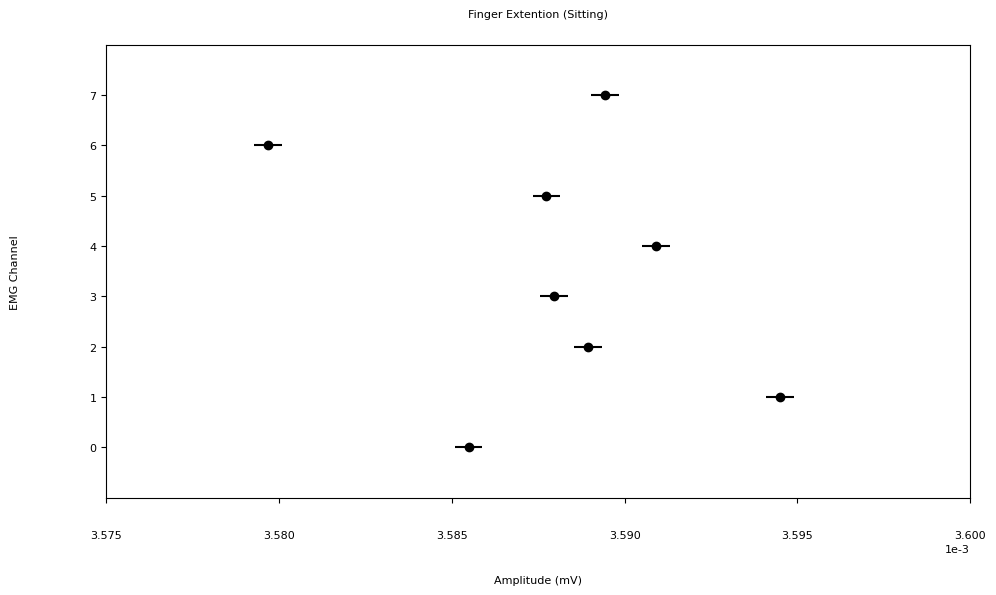

<Figure size 1200x3000 with 0 Axes>

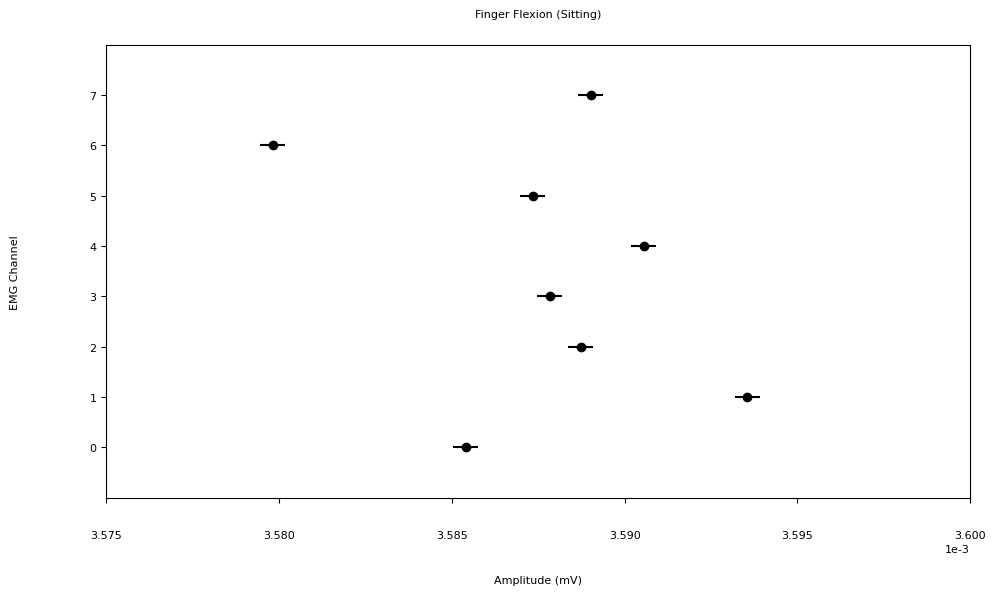

<Figure size 1200x3000 with 0 Axes>

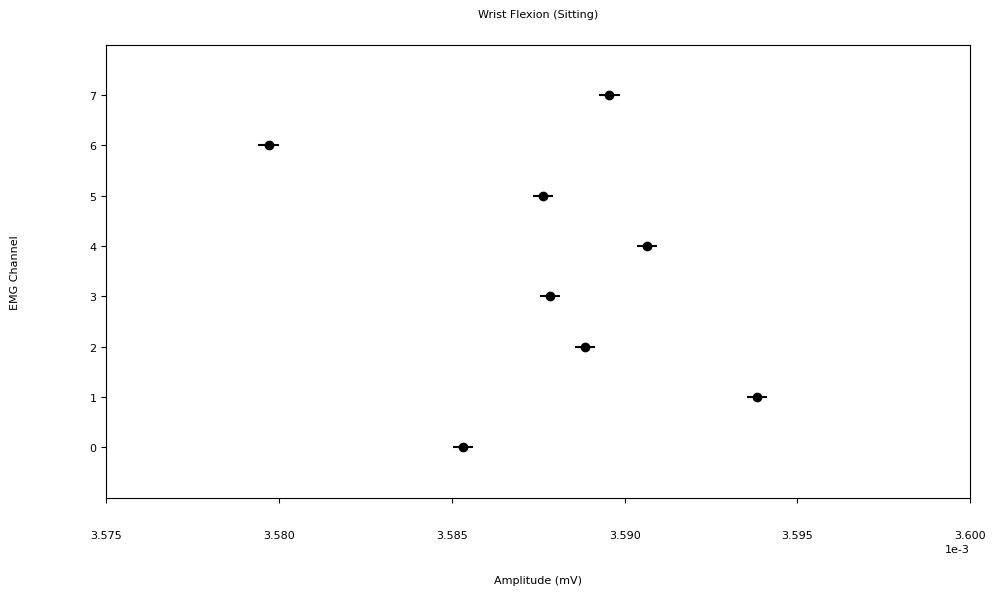

<Figure size 1200x3000 with 0 Axes>

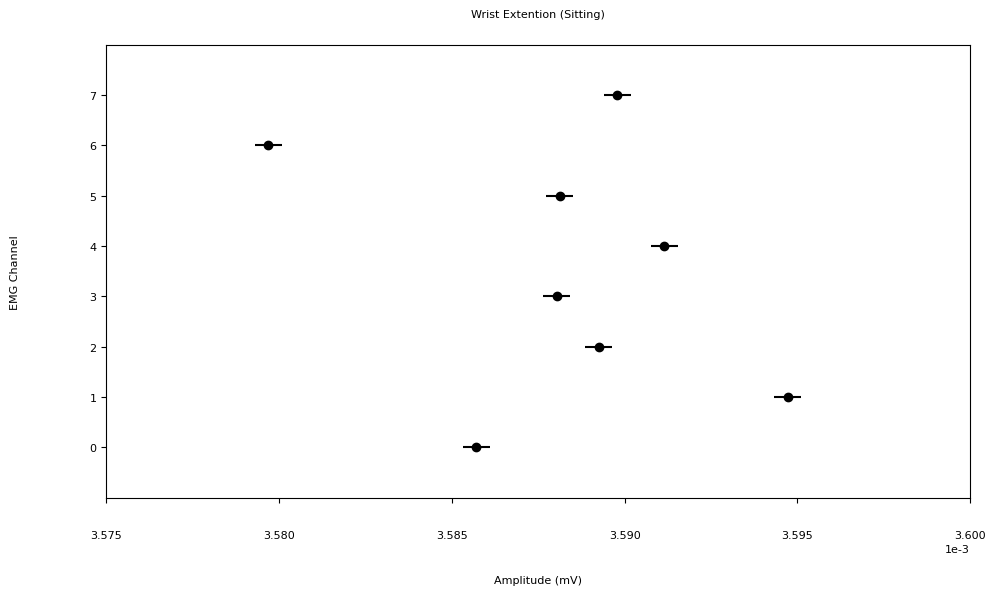

<Figure size 1200x3000 with 0 Axes>

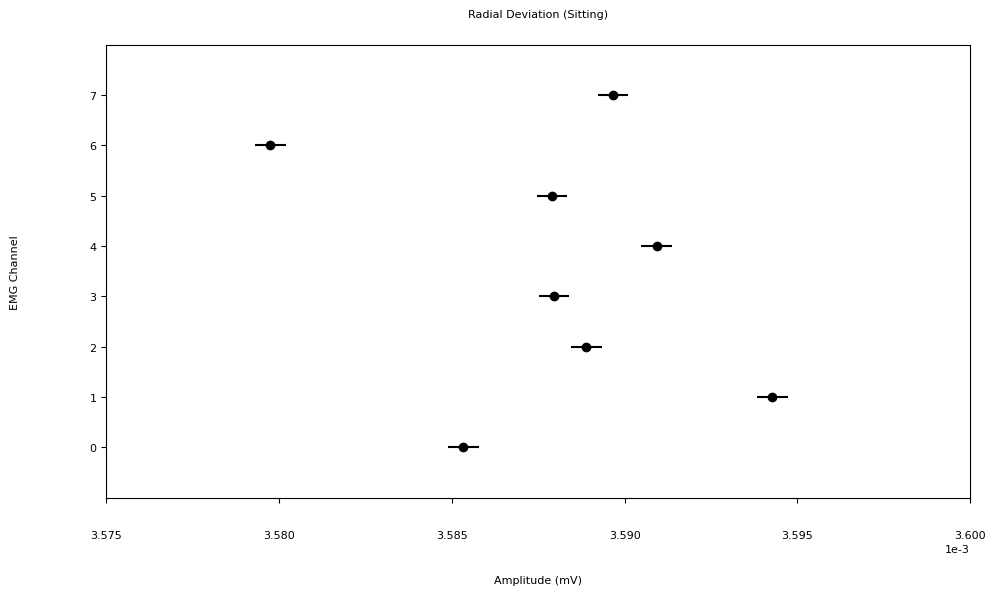

<Figure size 1200x3000 with 0 Axes>

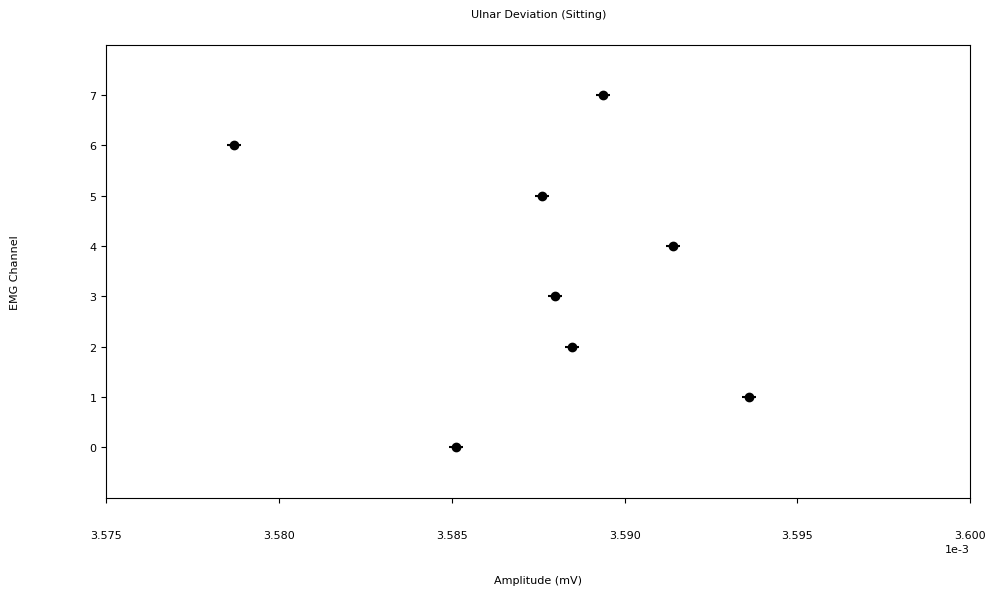

<Figure size 1200x3000 with 0 Axes>

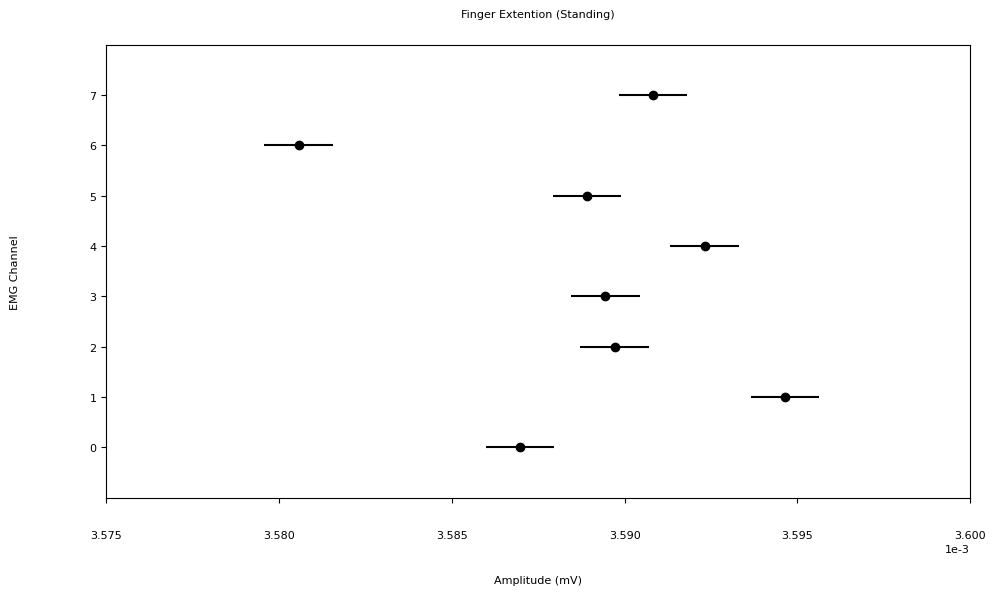

<Figure size 1200x3000 with 0 Axes>

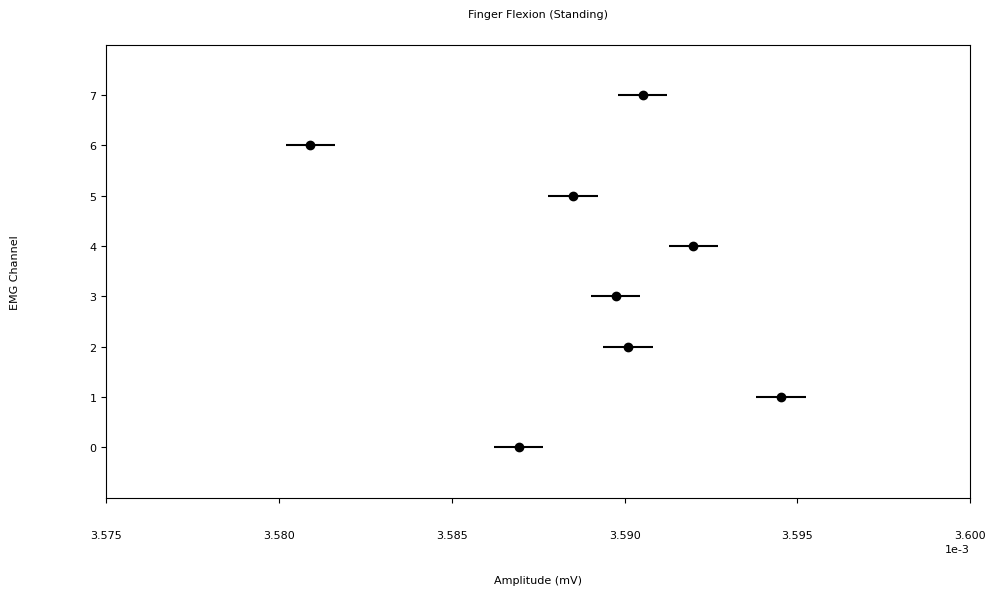

<Figure size 1200x3000 with 0 Axes>

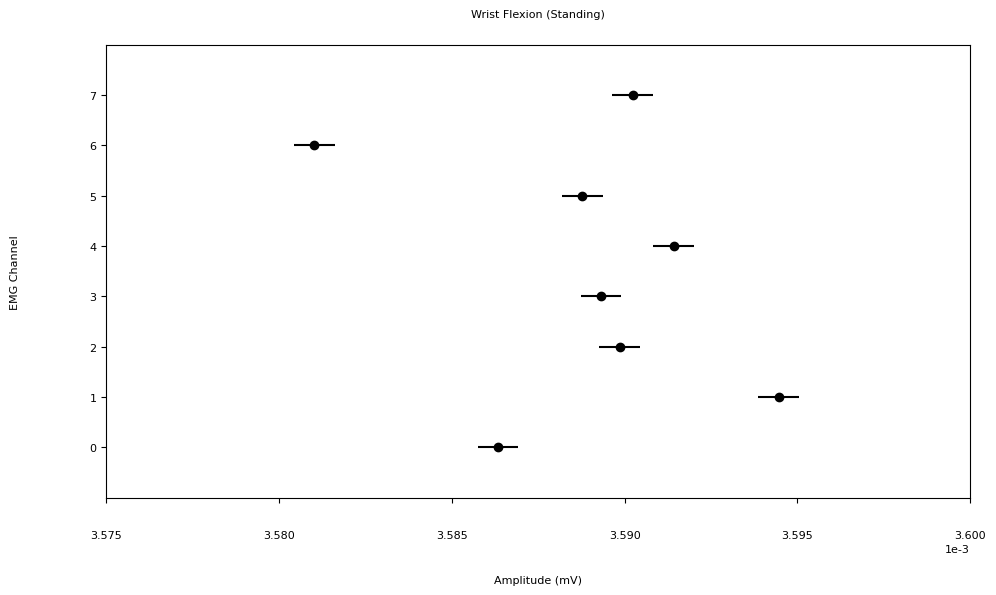

<Figure size 1200x3000 with 0 Axes>

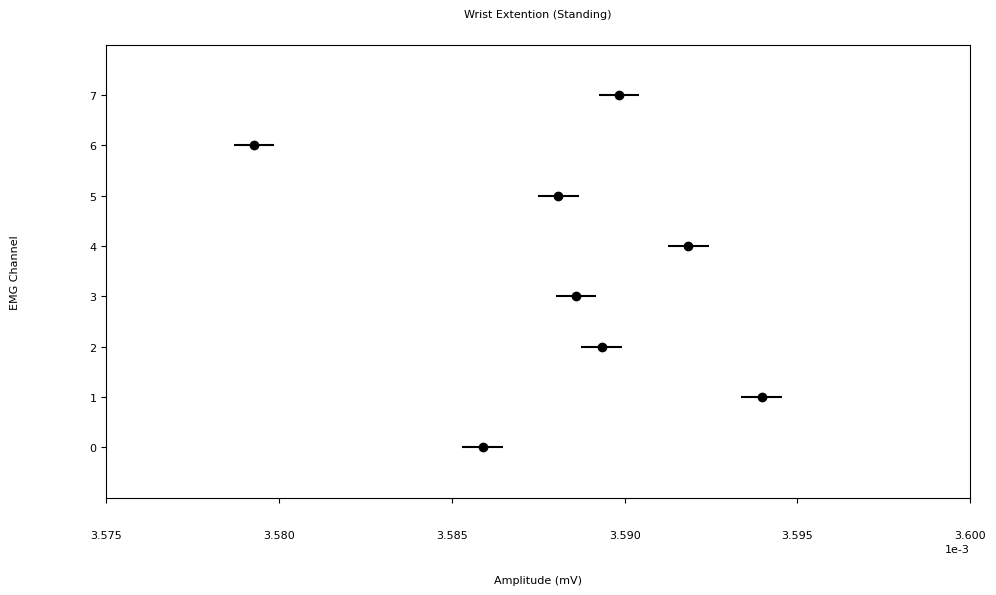

<Figure size 1200x3000 with 0 Axes>

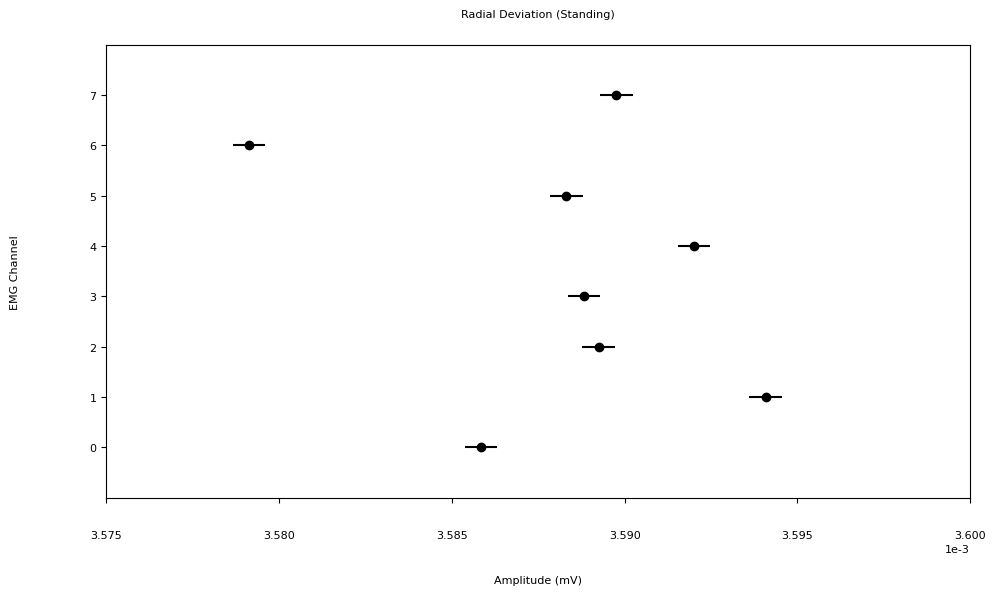

<Figure size 1200x3000 with 0 Axes>

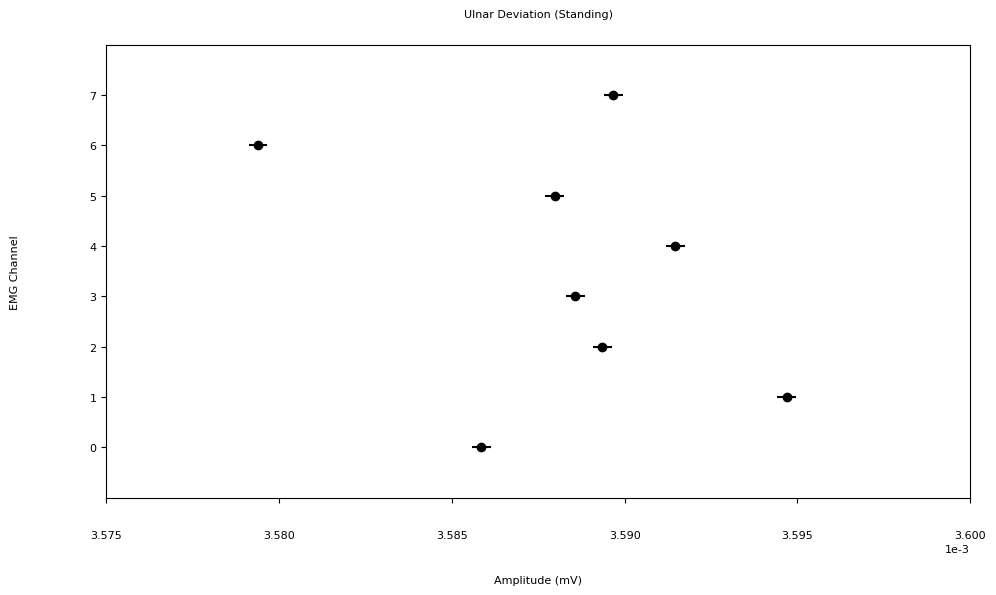

In [16]:
new_rc_params = {'text.usetex': False,
"svg.fonttype": 'none',
"axes.unicode_minus": False,
"font.size": 8,
}
mpl.rcParams.update(new_rc_params)

for a_key, a_df in emg_dict.items():
    print(a_key)
    mean_data = {
        "Repetition":[],
        "emg0":[],
        "emg1":[],
        "emg2":[],
        "emg3":[],
        "emg4":[],
        "emg5":[],
        "emg6":[],
        "emg7":[]
    }
    for key, df in a_df.items():
        print(key)
        mean_data["Repetition"].append(key)
        df = df.drop(columns=["receive_timestamp"])
        means = df.mean()
        for i, mean in means.items():
            mean_data[i].append(mean)
    mean_df = pd.DataFrame(mean_data)
    df_long = pd.melt(mean_df, id_vars=['Repetition'], 
                value_vars=['emg0', 'emg1', 'emg2', 'emg3', 'emg4', 'emg5', 'emg6', 'emg7'],
                var_name='Channel', value_name='Mean_Value')
    anova = AnovaRM(df_long, 'Mean_Value', 'Repetition', within=['Channel'])
    result = anova.fit()

    print(result)

    tukey = pairwise_tukeyhsd(endog=df_long['Mean_Value'],
                          groups=df_long['Channel'],
                          alpha=0.005)
    
    print(tukey.summary())
    plt.figure(figsize=(12, 30))
    fig = tukey.plot_simultaneous()
    
    plt.title(name_dict[a_key], pad=20, fontsize=8)
    plt.xlabel("Amplitude (mV)", fontsize=8, labelpad=25)
    plt.xticks(fontsize=8)
    plt.xlim(0.0035750, 0.0036)
    plt.ylabel("EMG Channel", fontsize=8, labelpad=50)
    plt.yticks(ticks=np.arange(0, 8), labels=np.arange(0, 8), fontsize=8)
    plt.tick_params(axis='x', labelsize=8, pad=20)
    plt.ticklabel_format(axis='x', style='sci', scilimits=(0,0))
    plt.tight_layout()
    plt.savefig(f"{name_dict[a_key]}.svg", format="svg", dpi=72)
    
    # for idx, (key, df) in enumerate(combined_dict.items()):
    # axes[idx].boxplot(df)
    # axes[idx].set_title(name_dict[key], fontsize=8, pad=20)
    # if idx % 3 == 0:
    #     axes[idx].set_ylabel("Amplitude (mV)", fontsize=8, labelpad=40)
    # axes[idx].set_xlabel("EMG Channel", fontsize=8, labelpad=25)    
    # axes[idx].set_xticklabels(np.arange(0, 8), fontsize=8,)
    # axes[idx].tick_params(axis='x', labelsize=8, pad=15)



# SiFi Stand

In [6]:
# load emg and log

fp = "../../data_collection/logs/2025_03_18_20_25_53_SiFi_Ex2_Stand/"

sifi_path = "sifiband/emg/emg.csv"
event_path = "event_log/event_log.csv"

sifi_df = pd.read_csv(os.path.join(fp, sifi_path))
event_df = pd.read_csv(os.path.join(fp, event_path))

In [7]:
emg_dict = {
    "a7":{},
    "a8":{},
    "a9":{},
    "a10":{},
    "a11":{},
    "a12":{},
}

for i, row in enumerate(event_df.iterrows()):
    if i%2 == 1:
        event = row[1]["Event"].split("_")[0]
        rep = row[1]["Event"].split("_")[1]
        start = event_df.loc[i-1, "Event Time"]
        end = row[1]["Event Time"]
        emg = crop_dataframes(sifi_df, start, end)
        emg_dict[event][rep] = emg

a7
1
2
3
4
5
6
                Anova
        F Value  Num DF  Den DF Pr > F
--------------------------------------
Channel 228.7241 7.0000 35.0000 0.0000

Multiple Comparison of Means - Tukey HSD, FWER=0.01
group1 group2 meandiff p-adj  lower upper reject
------------------------------------------------
  emg0   emg1      0.0    0.0   0.0   0.0   True
  emg0   emg2      0.0    0.0   0.0   0.0   True
  emg0   emg3      0.0 0.0003   0.0   0.0   True
  emg0   emg4      0.0    0.0   0.0   0.0   True
  emg0   emg5      0.0 0.0065  -0.0   0.0  False
  emg0   emg6     -0.0    0.0  -0.0  -0.0   True
  emg0   emg7      0.0    0.0   0.0   0.0   True
  emg1   emg2     -0.0    0.0  -0.0  -0.0   True
  emg1   emg3     -0.0    0.0  -0.0  -0.0   True
  emg1   emg4     -0.0 0.0006  -0.0  -0.0   True
  emg1   emg5     -0.0    0.0  -0.0  -0.0   True
  emg1   emg6     -0.0    0.0  -0.0  -0.0   True
  emg1   emg7     -0.0    0.0  -0.0  -0.0   True
  emg2   emg3     -0.0 0.9992  -0.0   0.0  False
  emg2   

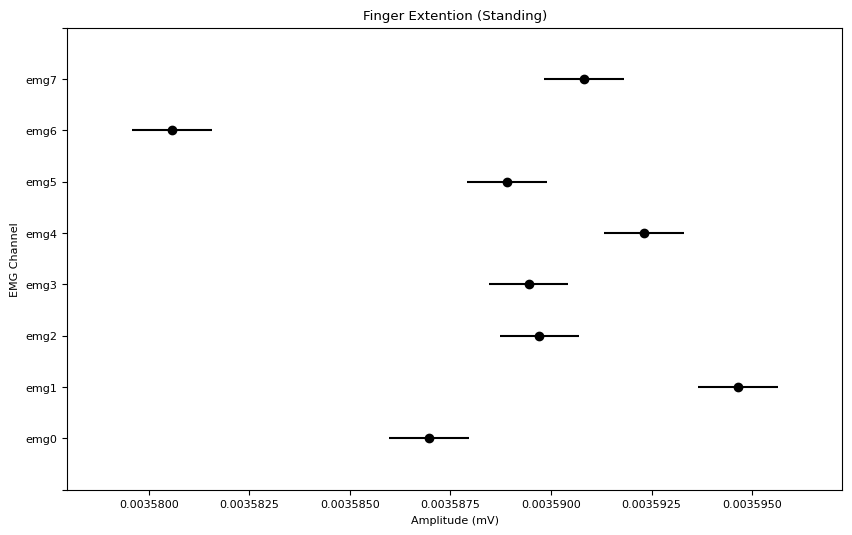

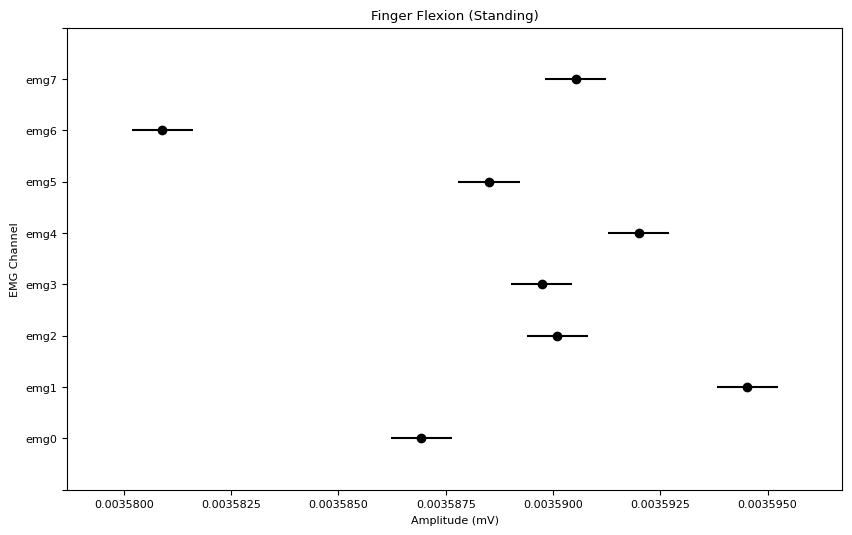

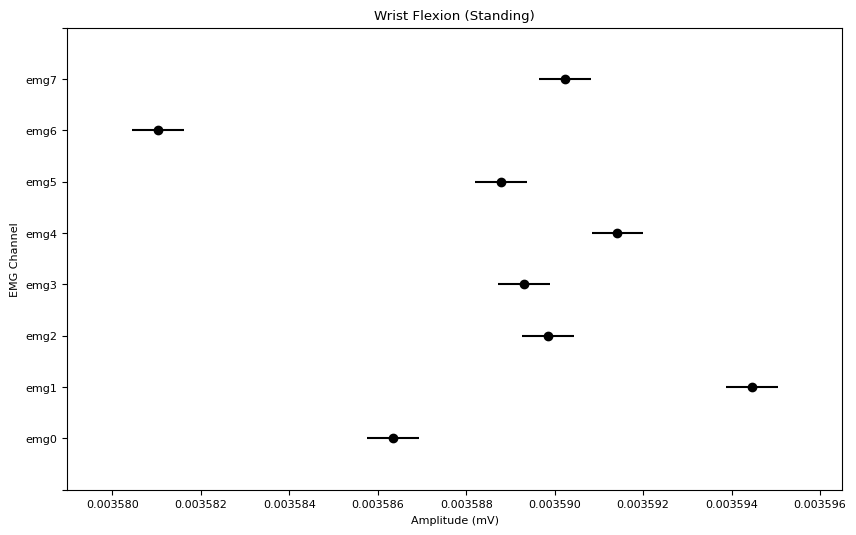

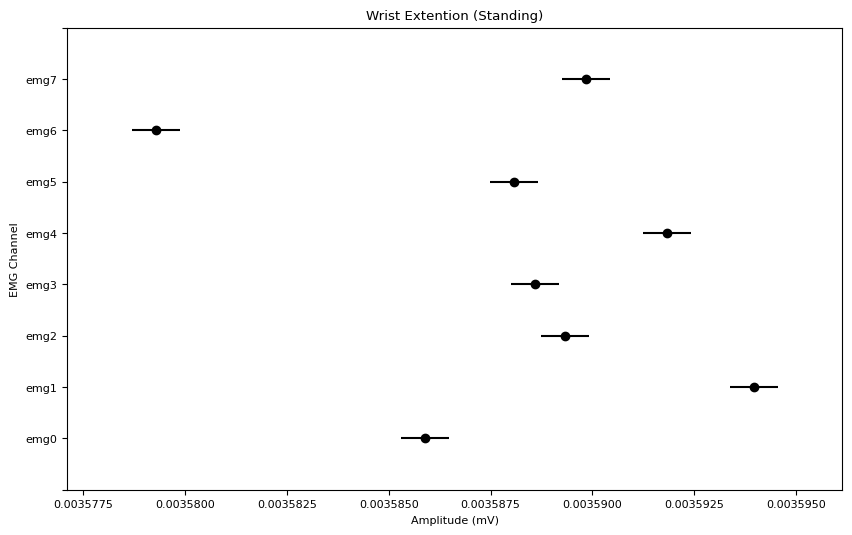

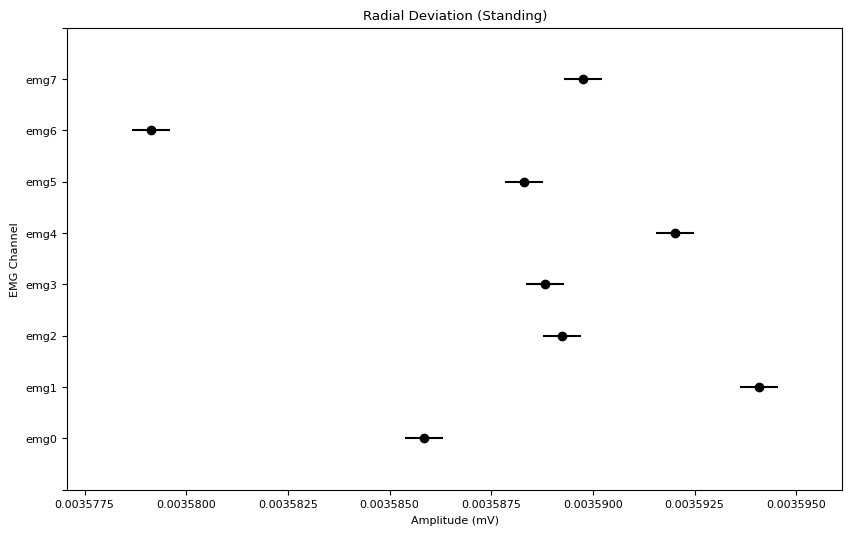

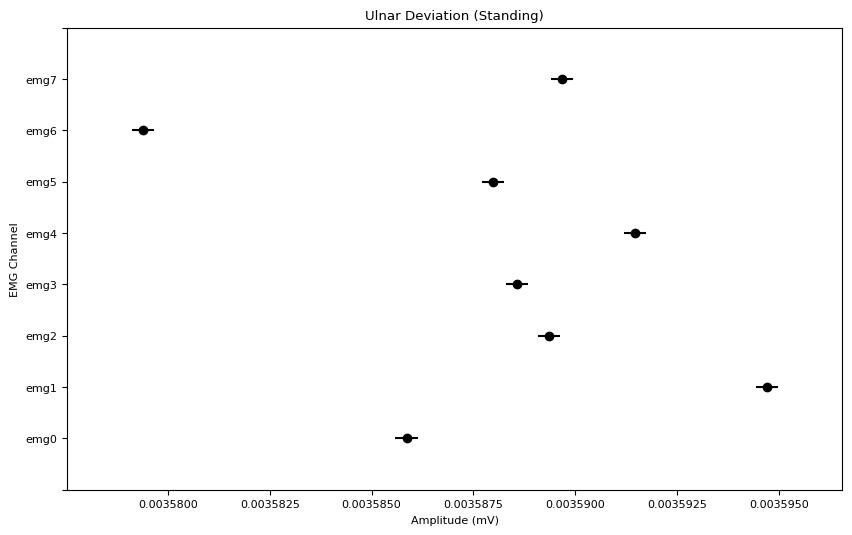

In [8]:
for a_key, a_df in emg_dict.items():
    print(a_key)
    mean_data = {
        "Repetition":[],
        "emg0":[],
        "emg1":[],
        "emg2":[],
        "emg3":[],
        "emg4":[],
        "emg5":[],
        "emg6":[],
        "emg7":[]
    }
    for key, df in a_df.items():
        print(key)
        mean_data["Repetition"].append(key)
        df = df.drop(columns=["receive_timestamp"])
        means = df.mean()
        for i, mean in means.items():
            mean_data[i].append(mean)
    mean_df = pd.DataFrame(mean_data)
    df_long = pd.melt(mean_df, id_vars=['Repetition'], 
                value_vars=['emg0', 'emg1', 'emg2', 'emg3', 'emg4', 'emg5', 'emg6', 'emg7'],
                var_name='Channel', value_name='Mean_Value')
    anova = AnovaRM(df_long, 'Mean_Value', 'Repetition', within=['Channel'])
    result = anova.fit()

    print(result)

    tukey = pairwise_tukeyhsd(endog=df_long['Mean_Value'],
                          groups=df_long['Channel'],
                          alpha=0.005)
    
    print(tukey.summary())
    fig = tukey.plot_simultaneous()
    plt.title(name_dict[a_key])
    plt.xlabel("Amplitude (mV)")
    plt.ylabel("EMG Channel")
    


# Channel Ranges

In [9]:
# load emg and log

fp = "../../data_collection/logs/2025_03_18_18_16_59_SiFi_Ex2_Sit/"

sifi_path = "sifiband/emg/emg.csv"
event_path = "event_log/event_log.csv"

sifi_df = pd.read_csv(os.path.join(fp, sifi_path))
event_df = pd.read_csv(os.path.join(fp, event_path))

In [10]:
emg_dict = {
    "a1":{},
    "a2":{},
    "a3":{},
    "a4":{},
    "a5":{},
    "a6":{},
    "a7":{},
    "a8":{},
    "a9":{},
    "a10":{},
    "a11":{},
    "a12":{},
}

for i, row in enumerate(event_df.iterrows()):
    if i%2 == 1:
        event = row[1]["Event"].split("_")[0]
        rep = row[1]["Event"].split("_")[1]
        start = event_df.loc[i-1, "Event Time"]
        end = row[1]["Event Time"]
        emg = crop_dataframes(sifi_df, start, end)
        emg_dict[event][rep] = emg

fp = "../../data_collection/logs/2025_03_18_20_25_53_SiFi_Ex2_Stand/"

sifi_path = "sifiband/emg/emg.csv"
event_path = "event_log/event_log.csv"

sifi_df = pd.read_csv(os.path.join(fp, sifi_path))
event_df = pd.read_csv(os.path.join(fp, event_path))

for i, row in enumerate(event_df.iterrows()):
    if i%2 == 1:
        event = row[1]["Event"].split("_")[0]
        rep = row[1]["Event"].split("_")[1]
        start = event_df.loc[i-1, "Event Time"]
        end = row[1]["Event Time"]
        emg = crop_dataframes(sifi_df, start, end)
        emg_dict[event][rep] = emg

{'whiskers': [<matplotlib.lines.Line2D at 0x252ae935270>,
 'caps': [<matplotlib.lines.Line2D at 0x252ae935870>,
 'boxes': [<matplotlib.lines.Line2D at 0x252af145a80>,
 'medians': [<matplotlib.lines.Line2D at 0x252ae935e70>,
 'fliers': [<matplotlib.lines.Line2D at 0x252ae936170>,
 'means': []}

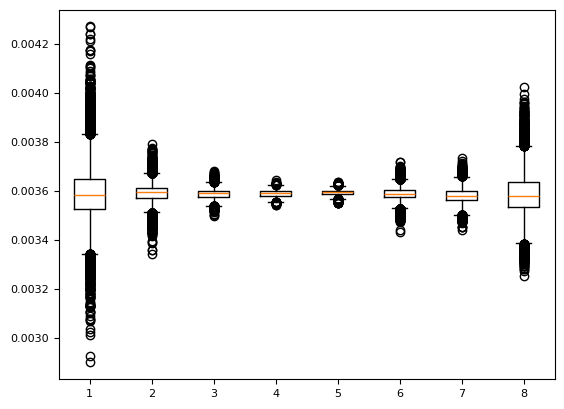

In [11]:
a1_dfs = []

for key, df in emg_dict["a1"].items():
    a1_dfs.append(df.drop(columns=["receive_timestamp"]))

combined_data = pd.concat(a1_dfs, ignore_index=True)


plt.boxplot(combined_data)

In [12]:
combined_data

,emg3,emg4,emg7,emg2,emg1,emg5,emg6,emg0
0,0.003689,0.003550,0.003583,0.003578,0.003582,0.003559,0.003580,0.003627
1,0.003641,0.003571,0.003594,0.003580,0.003594,0.003562,0.003580,0.003639
2,0.003515,0.003629,0.003580,0.003578,0.003603,0.003615,0.003573,0.003559
3,0.003531,0.003643,0.003580,0.003590,0.003585,0.003611,0.003561,0.003552
4,0.003613,0.003617,0.003601,0.003583,0.003603,0.003610,0.003592,0.003601
...,...,...,...,...,...,...,...,...
27539,0.003522,0.003620,0.003550,0.003582,0.003573,0.003583,0.003569,0.003489
27540,0.003526,0.003615,0.003555,0.003576,0.003603,0.003573,0.003575,0.003496
27541,0.003491,0.003606,0.003594,0.003582,0.003599,0.003578,0.003569,0.003459
27542,0.003485,0.003599,0.003615,0.003592,0.003604,0.003592,0.003561,0.003459


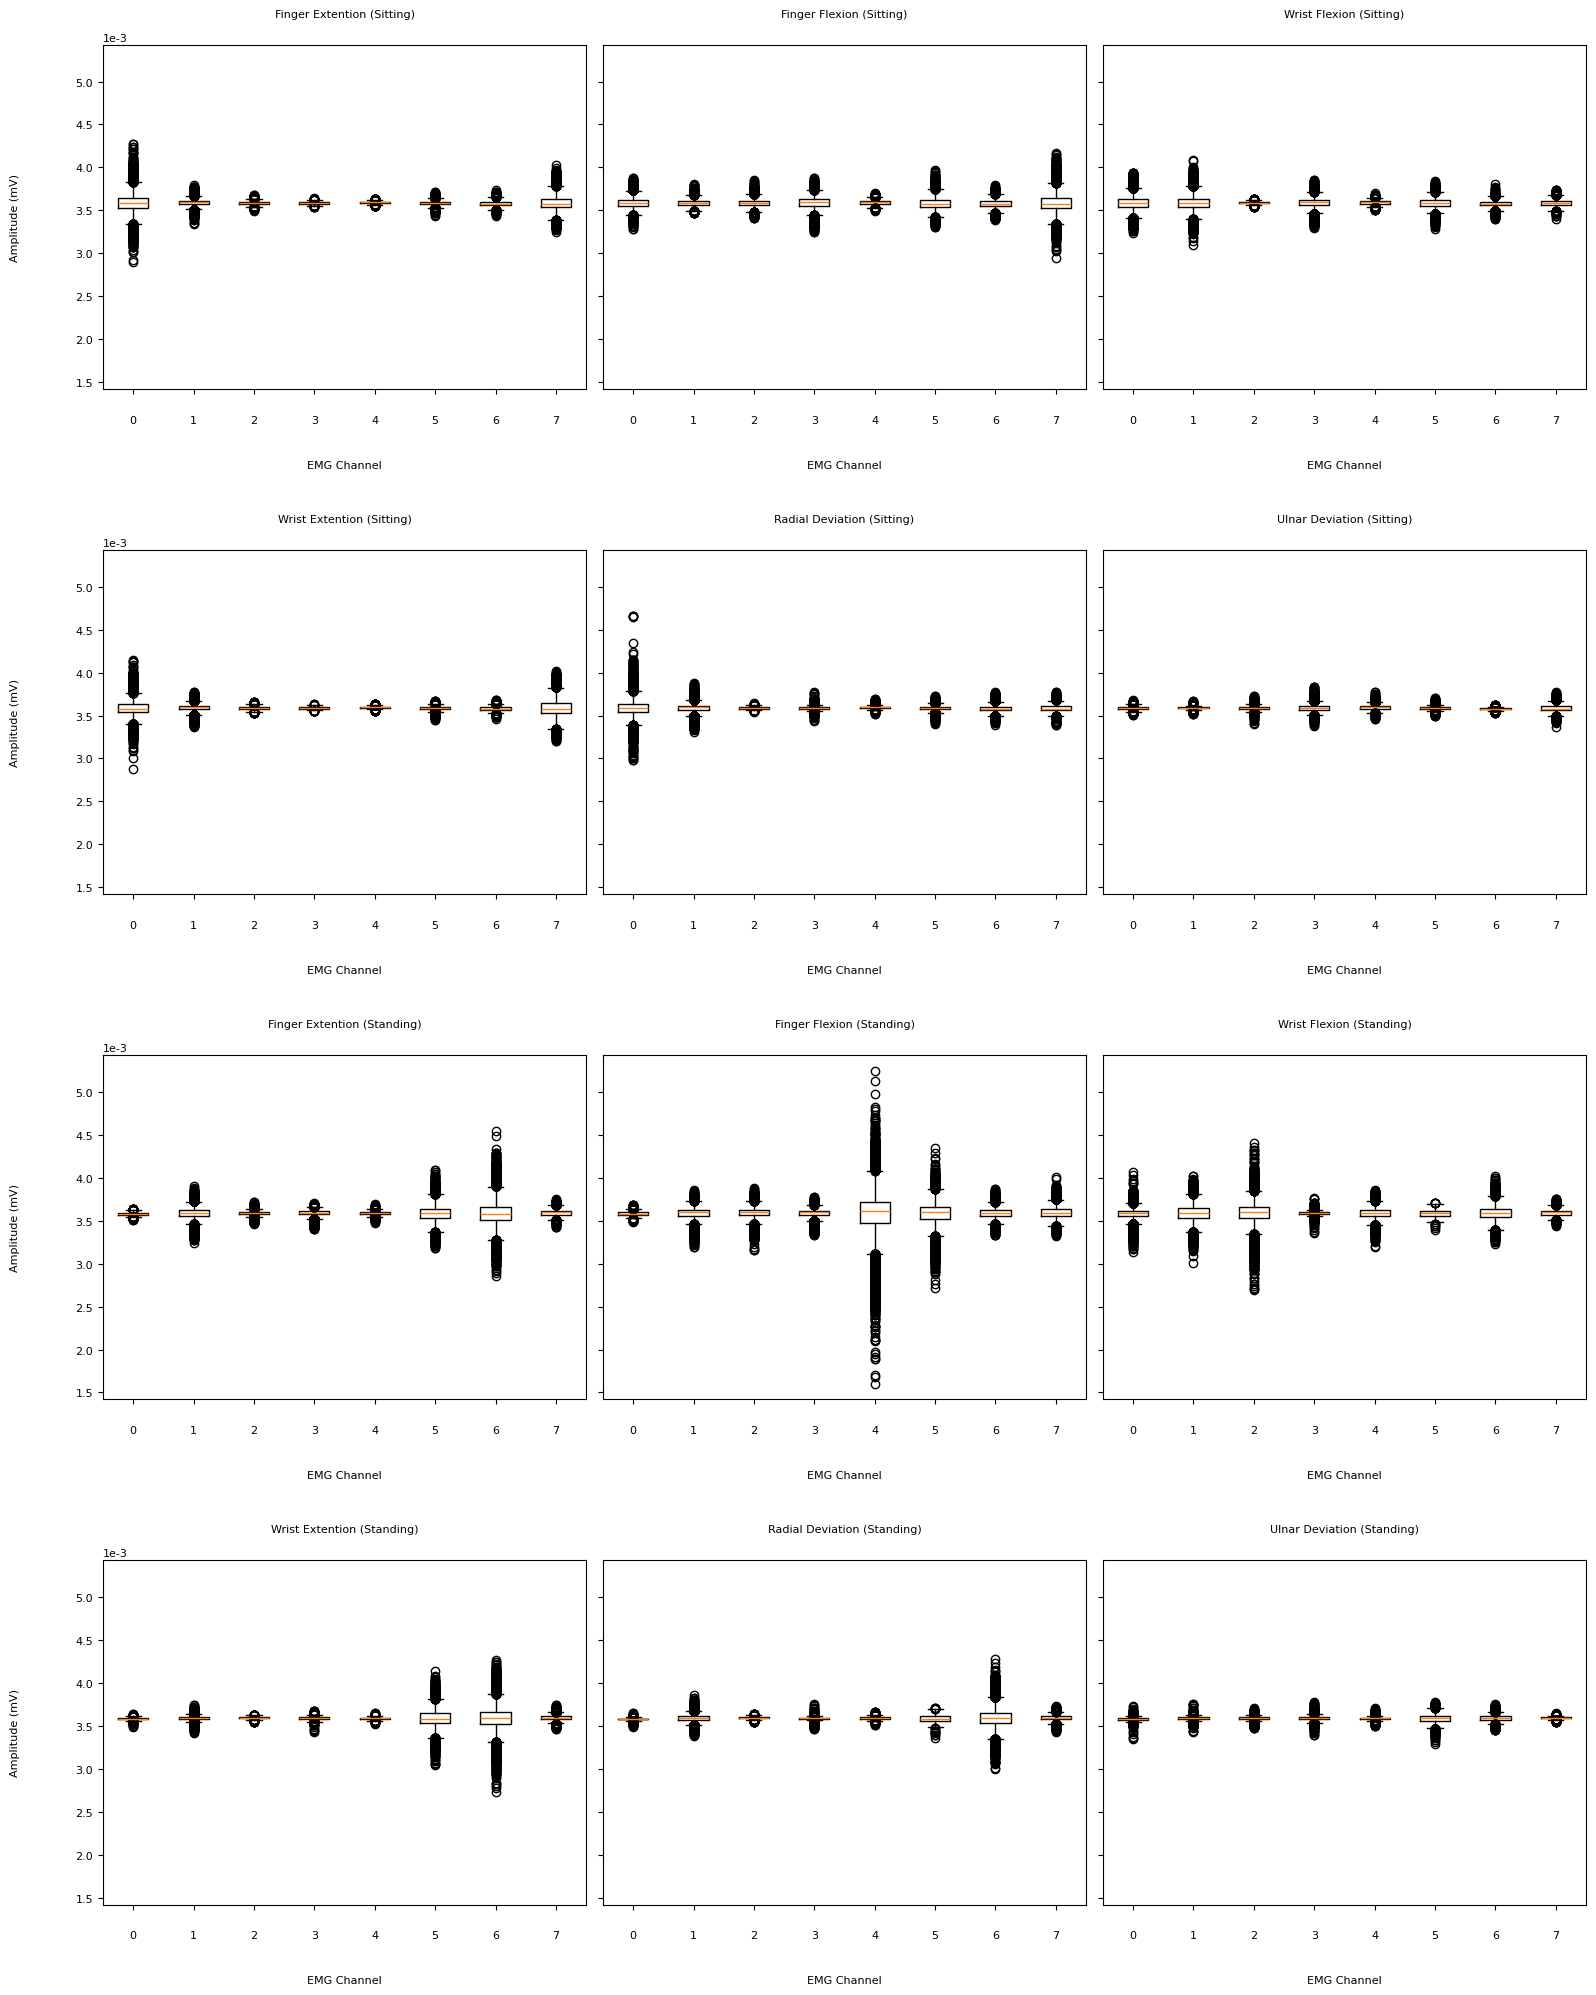

In [ ]:
new_rc_params = {'text.usetex': False,
"svg.fonttype": 'none',
"axes.unicode_minus": False,
"font.size": 8,
}
mpl.rcParams.update(new_rc_params)
combined_dict = {}

for a_key, a_df in emg_dict.items():
    #print(a_key)
    dfs = []
    for key, df in a_df.items():
        dfs.append(df.drop(columns=["receive_timestamp"]))

    combined_data = pd.concat(dfs, ignore_index=True)
    combined_dict[a_key] = combined_data

stats_dict = {}

for key, df in combined_dict.items():
    stats_dict[name_dict[key]] = pd.DataFrame({
        'Mean': df.mean(),
        'Median': df.median(),
        'SD': df.std(),
        'IQR': df.quantile(0.75) - df.quantile(0.25),
        '25th':df.quantile(0.25),
        '75th':df.quantile(0.75)
    }).T

fig, axes = plt.subplots(nrows=4, ncols=3, figsize=(16, 20), sharey=True)

axes = axes.flatten()

for idx, (key, df) in enumerate(combined_dict.items()):
    axes[idx].boxplot(df)
    axes[idx].set_title(name_dict[key], fontsize=8, pad=20)
    if idx % 3 == 0:
        axes[idx].set_ylabel("Amplitude (mV)", fontsize=8, labelpad=40)
    axes[idx].set_xlabel("EMG Channel", fontsize=8, labelpad=25)    
    axes[idx].set_xticklabels(np.arange(0, 8), fontsize=8,)
    axes[idx].tick_params(axis='x', labelsize=8, pad=15)
    plt.ticklabel_format(axis='y', style='sci', scilimits=(0,0))

plt.tight_layout(h_pad=4.0)
plt.savefig("channel_summary2.svg", format="svg", dpi=72)
plt.show()

In [14]:
stats_list = list(stats_dict.values())

combined_stats = pd.concat(stats_list, axis=0)

mean_of_means = combined_stats.loc['Mean'].mean()
mean_of_medians = combined_stats.loc['Median'].mean()
mean_of_sds = combined_stats.loc['SD'].mean()
mean_of_iqrs = combined_stats.loc['IQR'].mean()
mean_of_25th = combined_stats.loc['25th'].mean()
mean_of_75th = combined_stats.loc['75th'].mean()

In [15]:
combined_stats

,emg3,emg4,emg7,emg2,emg1,emg5,emg6,emg0
Mean,0.003588,0.003591,0.003589,0.003589,0.003594,0.003588,0.003580,0.003585
Median,0.003582,0.003594,0.003590,0.003590,0.003596,0.003589,0.003578,0.003580
SD,0.000108,0.000036,0.000018,0.000011,0.000010,0.000025,0.000028,0.000080
IQR,0.000123,0.000040,0.000025,0.000018,0.000014,0.000030,0.000039,0.000100
25th,0.003526,0.003571,0.003576,0.003580,0.003587,0.003573,0.003561,0.003534
...,...,...,...,...,...,...,...,...
Median,0.003590,0.003592,0.003590,0.003590,0.003596,0.003589,0.003578,0.003585
SD,0.000021,0.000016,0.000030,0.000015,0.000011,0.000014,0.000014,0.000043
IQR,0.000026,0.000019,0.000037,0.000016,0.000012,0.000016,0.000018,0.000060
25th,0.003575,0.003582,0.003571,0.003582,0.003589,0.003580,0.003571,0.003557


In [16]:
mean_of_25th

emg3    0.003561
emg4    0.003569
emg7    0.003557
emg2    0.003567
emg1    0.003578
emg5    0.003563
emg6    0.003565
emg0    0.003544
dtype: float64

In [17]:
mean_of_75th

emg3    0.003615
emg4    0.003614
emg7    0.003621
emg2    0.003613
emg1    0.003609
emg5    0.003615
emg6    0.003596
emg0    0.003628
dtype: float64